Для начала с помощью скрипта calculate_models.sh и вспомогательных awk.sh и gnuplot.sh запускаем моделирование для различных размеров щели
На выходе получаем папку lj с подпапками с результатами моделирования, в телегу приходит сообщение с картинкой

Дальше обрабатываем их с помощью скрипта analis.py, он нам с распараллеливанием все быстренько считает и выдает MSD для разных диаметров в виде pickle файла

Теперь построим графики

In [5]:
import pickle
with open("dump.pickle", "rb") as f:
    data = pickle.load(f)

Здесь нерабочий plotly, ну мб он на паре заработает

In [6]:
t=list(data[0][1].keys())
MSD=list(data[0][1].values())
import plotly as ply
import plotly.graph_objs as go

#timesteps = np.arange(1000, 2101001, step)

fig = go.Figure()

#fig.update_xaxes(range=[0, 200], title="Step")
fig.add_trace(go.Scatter(x=t, y=MSD, name="Ions"))
#fig.add_trace(go.Scatter(x=MSD_e.keys(), y=MSD_e.values(), name="Electrons"))

fig.show()

Здесь рабочий matplotlib

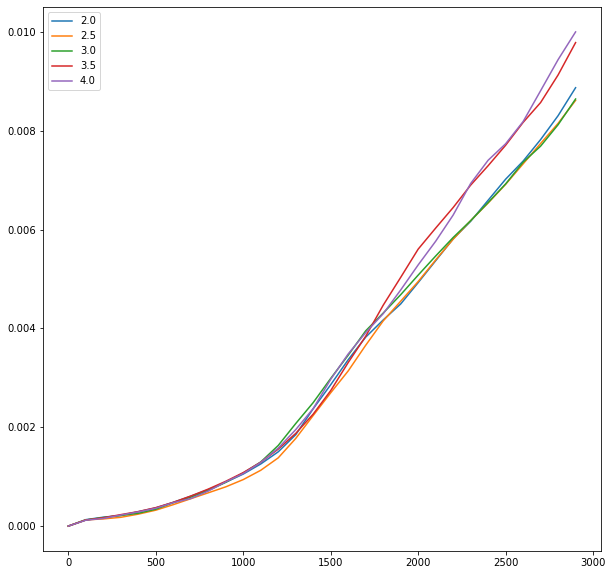

In [7]:
import matplotlib.pyplot as plt
line=[0,0,0,0,0]
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
for i in range(5):
    t=list(data[i][1].keys())
    MSD=list(data[i][1].values())
    line[i], = plt.plot(t,MSD)
leg = [data[i][0] for i in range(5)]
plt.legend(line,leg)
plt.show()

Теперь ovito.py строит нам красивую визуализацию для какого-нибудь диаметра (shear_visual.mp4), можно для разных, но он и так слишком долго считается

In [4]:
from ase import Atoms
from ase.visualize import view
def read_xyz(fileobj):
# This function reads first all atoms and then yields based
# on the index.
# Perfomance could be improved, but this serves as a simple
# reference.
# It'd require more code to estimate the total number of images
# without reading through the whole file (note: the number of atoms
# can differ for every image).
    lines = fileobj.readlines()
    images = []
    while len(lines) > 0:
        symbols = []
        positions = []
        natoms = int(lines[3])
        for i in range(natoms):
            line = lines[9+i].split()
            symbol = float(line[1])
            x=float(line[2])
            y=float(line[3])
            z=float(line[4])
            if symbol==1:
                symbol="H"
            else:
                symbol="He"
            symbols.append(symbol)
            positions.append([float(x), float(y), float(z)])
        images.append(Atoms(symbols=symbols, positions=positions))
        lines=lines[10*(9+natoms):]
    return images
f=open("lj/diam_3.0/dump.shear.void", "r")
data = read_xyz(f)
view(data[2], viewer='ngl')